# Create a crowd of pedestrians with custom statistics

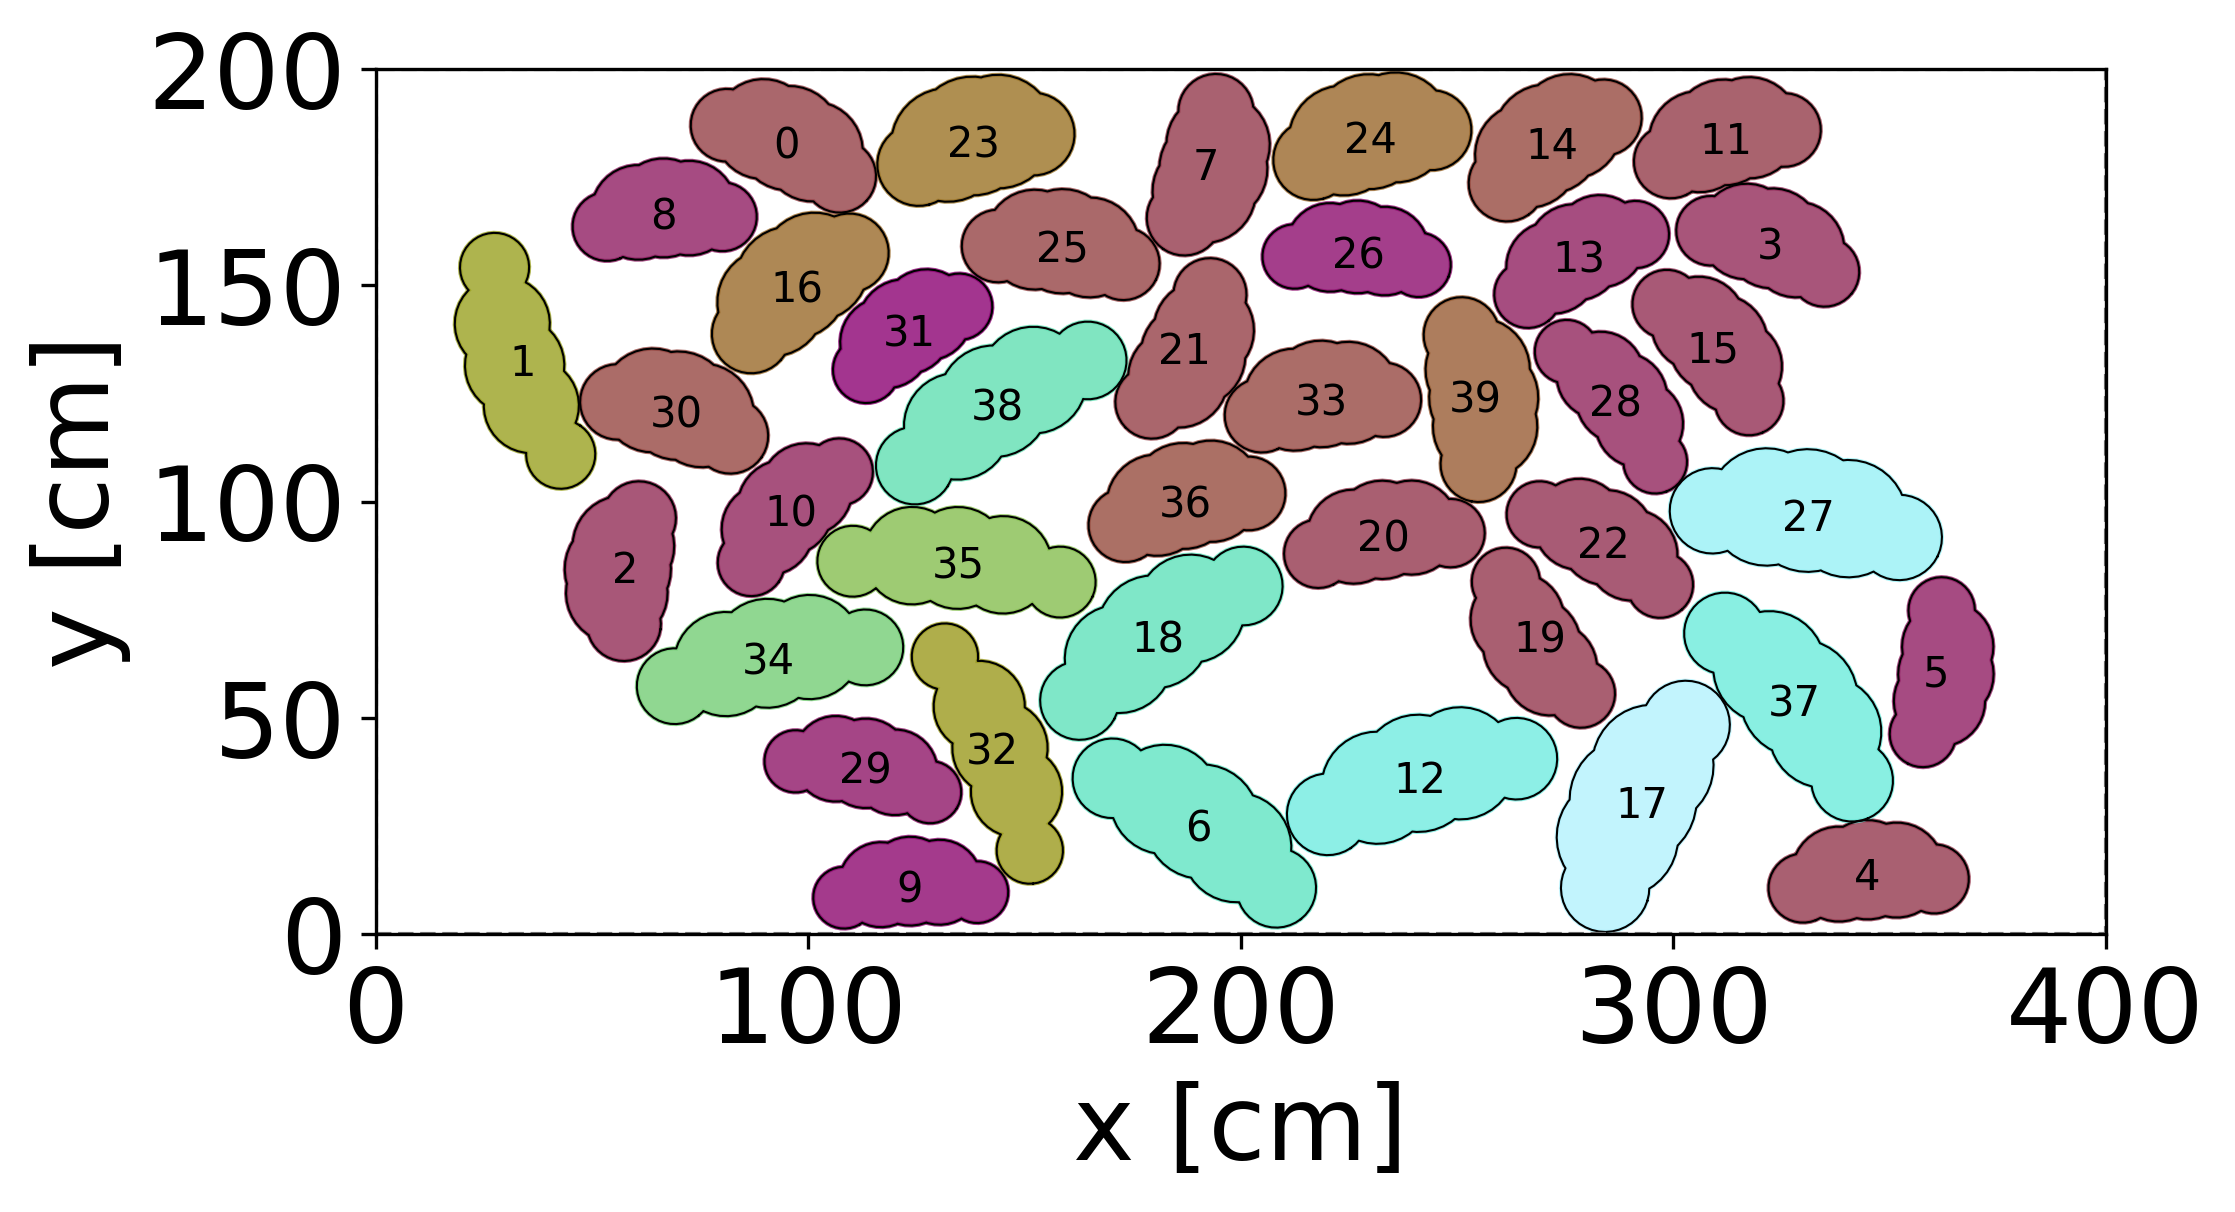

In [1]:
import matplotlib.pyplot as plt
from streamlit_app.plot import plot
from shapely.geometry import Polygon
from pathlib import Path

import configuration.utils.constants as cst
import configuration.backup.crowd_to_zip_and_reverse as fun_zip
from configuration.models.crowd import Crowd
from configuration.models.measures import CrowdMeasures

%matplotlib inline

# Constants
boundaries = Polygon([(0.0, 0.0), (400.0, 0.0), (400.0, 200.0), (0.0, 200.0)])  # (cm)
NUMBER_AGENTS: int = 40
REPULSION_LENGTH: float = 5.0  # (cm)
DESIRED_DIRECTION: float = 90.0  # (degrees)
VARIABLE_ORIENTATION: bool = True
agent_statistics = cst.CrowdStat.copy()

# Update the agent statistics dictionary with custom values
agent_statistics.update(
    {
        "male_proportion": 0.3,
        "male_bideltoid_breadth_mean": 70.0,  # cm
        "male_bideltoid_breadth_std_dev": 3.0,  # cm
    }
)

# Create the packed crowd
crowd_measures = CrowdMeasures(agent_statistics=agent_statistics)
crowd = Crowd(boundaries=boundaries, measures=crowd_measures)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(
    repulsion_length=REPULSION_LENGTH, desired_direction=DESIRED_DIRECTION, variable_orientation=VARIABLE_ORIENTATION
)

# Visualize results
plot.display_crowd2D(crowd)
plt.show()

# Download the xml configuration files necessary for the simulation to a zip format
output_zip_path = Path.cwd().parent.parent.parent / "data" / "xml" / "crowd_custom.zip"
fun_zip.save_crowd_data_to_zip(crowd, output_zip_path)

## Get some anthropometric statistics from the created crowd

In [2]:
import configuration.utils.functions as fun
import pprint

crowd_statistics = crowd.get_crowd_statistics()

# Print the crowd statistics
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["measures"]))

{'bike_proportion': 0.0,
 'female_bideltoid_breadth_max': 47.61662981419438,
 'female_bideltoid_breadth_mean': 45.225410385727415,
 'female_bideltoid_breadth_min': 41.3409277917306,
 'female_bideltoid_breadth_std_dev': 1.708970167778921,
 'female_chest_depth_max': 27.477589345886557,
 'female_chest_depth_mean': 23.56468885149855,
 'female_chest_depth_min': 20.548006518661804,
 'female_chest_depth_std_dev': 1.7689686686100825,
 'female_height_max': 177.07885549596523,
 'female_height_mean': 163.0116436675823,
 'female_height_min': 146.96064115397735,
 'female_height_std_dev': 8.01898855802242,
 'female_weight_max': 87.67215417041635,
 'female_weight_mean': 68.0316440102898,
 'female_weight_min': 46.61525848540077,
 'female_weight_std_dev': 9.541021981646065,
 'male_bideltoid_breadth_max': 64.75404229475316,
 'male_bideltoid_breadth_mean': 63.671305955846904,
 'male_bideltoid_breadth_min': 61.80830903854928,
 'male_bideltoid_breadth_std_dev': 0.9977005272243731,
 'male_chest_depth_max': 